<a href="https://colab.research.google.com/github/DeuklyoungKo/MakeYourFirstGANWithPyTorch/blob/main/ch02_03_ANNByClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import torch
import torch.nn as nn
import pandas

In [59]:
# nn.Module 상속, 신경망 클래스 생성 지원
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()

    self.model = nn.Sequential(
        #노드 매핑 784개 -> 200개, 선형함수, 학습 파라미터.
        nn.Linear(784,200),
        #S 모양 로지스틱 활성화 함수
        nn.Sigmoid(),
        nn.Linear(200,10),
        nn.Sigmoid()
    )

    #평균제곱오차, 손실함수
    self.loss_function = nn.MSELoss()

    # 확률적 경사 하강법
    self.optimiser = torch.optim.SGD(self.parameters(),lr=0.01)

    #변수 초기화
    self.counter = 0
    self.progress = []
    pass
  
  def forward(self, inputs):
    return self.model(inputs)

  def train(self, inputs, targets):
    # 신경망 출력 계산
    outputs = self.forward(inputs)
    # 손실 계산
    loss = self.loss_function(outputs, targets)


    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()


    self.counter += 1
    if (self.counter % 10 == 0):
      self.progress.append(loss.item())

    if (self.counter % 10000 == 0):
      print("self.counter:",self.counter)

  def plot_progress(self):
    df = pandas.DataFrame(self.progress, columns=['loss'])
    df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
    pass

In [60]:
from torch.utils.data import Dataset
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('./mount')

class MnistDataset(Dataset):
  def __init__(self, csv_file):
    self.data_df = pandas.read_csv(csv_file, header=None)
    pass

  def __len__(self):
    return len(self.data_df)

  def __getitem__(self, index):
    label = self.data_df.iloc[index,0]
    target = torch.zeros((10))
    target[label] = 1.0

    image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values) / 255.0
    return label, image_values, target

  def plot_image(self, index):
    img = self.data_df.iloc[index,1:].values.reshape(28,28)
    plt.title("label = " + str(self.data_df.iloc[index,0]))
    plt.imshow(img, interpolation='none', cmap='Blues')
    pass
  
  pass

Drive already mounted at ./mount; to attempt to forcibly remount, call drive.mount("./mount", force_remount=True).


In [61]:
mnist_dataset = MnistDataset('mount/My Drive/Colab Notebooks/Deep Learning/MakeYourFirstGANWithPyTorch/mnist_data/mnist_train.csv')

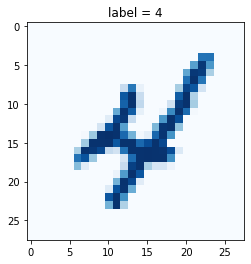

In [62]:
mnist_dataset.plot_image(9)

## Starting train

In [63]:
%%time

#신경망 생성
C = Classifier()

epochs = 3

for i in range(epochs):
  print('training epoch', i+1, "of", epochs)
  for label, image_data_tensor, target_tensor in mnist_dataset:
    C.train(image_data_tensor, target_tensor)
    pass
  pass

training epoch 1 of 3
self.counter: 10000
self.counter: 20000
self.counter: 30000
self.counter: 40000
self.counter: 50000
self.counter: 60000
training epoch 2 of 3
self.counter: 70000
self.counter: 80000
self.counter: 90000
self.counter: 100000
self.counter: 110000
self.counter: 120000
training epoch 3 of 3
self.counter: 130000
self.counter: 140000
self.counter: 150000
self.counter: 160000
self.counter: 170000
self.counter: 180000
CPU times: user 4min, sys: 2.63 s, total: 4min 3s
Wall time: 4min 4s


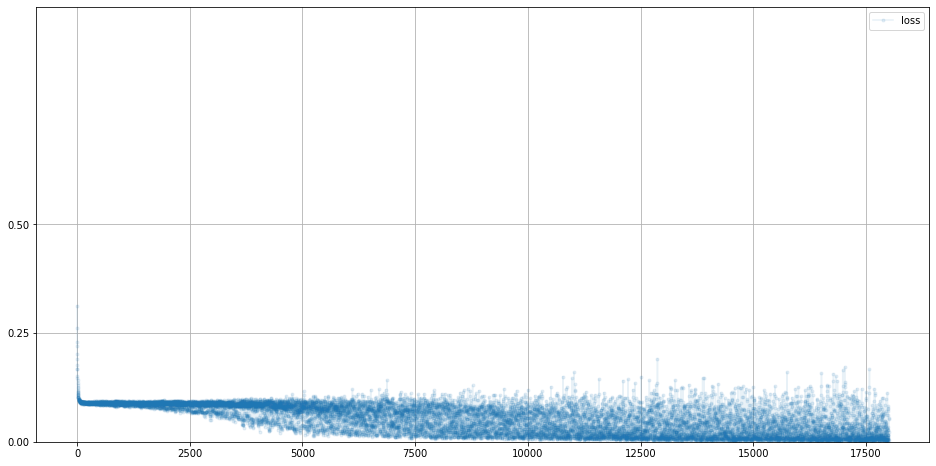

In [64]:
C.plot_progress()

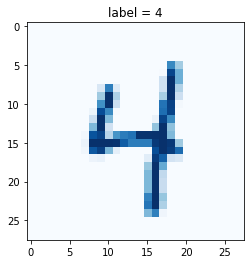

In [66]:
mnist_test_dataset = MnistDataset('mount/My Drive/Colab Notebooks/Deep Learning/MakeYourFirstGANWithPyTorch/mnist_data/mnist_test.csv')
record = 19

mnist_test_dataset.plot_image(record)

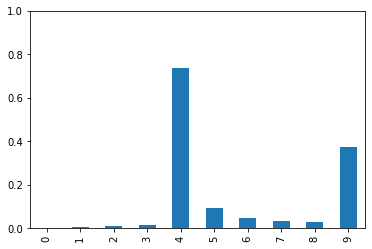

In [68]:
image_data = mnist_test_dataset[record][1]
output = C.forward(image_data)

pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0,1))

In [70]:
score = 0
items = 0

for label, image_data_tensor, target_tensor in mnist_test_dataset:
  answer = C.forward(image_data_tensor).detach().numpy()
  if (answer.argmax() == label):
    score += 1
    pass
  items += 1

  pass

print(score, items, score/items)

8673 10000 0.8673
